<center> <h1 style="background-color:DarkSlateBlue; color:white" > <b> A/B Testing: Step by Step & Hypothesis Testing </b> </h1> </center>

<center><img
src="https://tactilegames.com/wp-content/uploads/2018/05/cookie-cats.png" style="width:40%;height:40%;">
</center>

### Project Description from [**DataCamp**](https://www.datacamp.com/projects/184).

Cookie Cats [[View Game]](https://www.youtube.com/embed/0G-612U2vQY) is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. It also features singing cats.

**As players progress through the game they will encounter gates that force them to wait sometime before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention and game rounds.**

### Data Description from [**Aurelia Sui's Notebook**](https://www.kaggle.com/yufengsui/datacamp-project-mobile-games-a-b-testing) and [**Ekrem Bayar's Notebook**](https://www.kaggle.com/ekrembayar/a-b-testing-step-by-step-hypothesis-testing).

The [dataset](https://www.kaggle.com/yufengsui/mobile-games-ab-testing) is from 90,189 players that installed the game while the A/B test was running. The variables are:

<li><code>userid</code> - a unique number that identifies each player.</li>
<li><code>version</code> - whether the player was put in the control group (<code>gate_30</code> - a gate at level 30) or the test group (<code>gate_40</code> - a gate at level 40).</li>
<li><code>sum_gamerounds</code> - the number of game rounds played by the player during the first week after installation.
<li><code>retention_1</code> - did the player come back and play 1 day after installing?</li>
<li><code>retention_7</code> - did the player come back and play 7 days after installing?</li>

<p>When a player installed the game, he or she was randomly assigned to either <code>gate_30</code> or <code>gate_40</code>. </p>

### A/B Testing Process.

1. Understanding business problems & data.
2. Detect and resolve problems in the data (Missing Value, Outliers, Unexpected Value).
3. Look at summary stats and plots.
4. Apply hypothesis testing and check assumptions.
    - Check Normality & Homogeneity.
    - Apply tests (Shapiro, Levene Test, T-test, Welch Test, Mann Whitney U Test).
5. Evaluate the results.
6. Make inferences.
7. Recommend business decisions to your Customer/Director/CEO etc.

In [ ]:
# Install Kaggle.
!pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
# Files Upload.
from google.colab import files

files.upload()

In [ ]:
# Create a Kaggle Folder.
!mkdir ~/.kaggle

# Copy the kaggle.json to the folder created.
!cp kaggle.json ~/.kaggle/

# Permission for the json file to act.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Dataset Download.
!kaggle datasets download -d yufengsui/mobile-games-ab-testing

In [ ]:
# Unzip Dataset.
!unzip mobile-games-ab-testing.zip

# **Import Packages**

In [ ]:
# Import Library.
# -----------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, io

# Hypothesis Testing.
# -----------------------------------
from scipy.stats import shapiro
import scipy.stats as stats

# Configuration.
# -----------------------------------
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:.4f}".format

# **Load Dataset**

In [ ]:
path = "/content/cookie_cats.csv"


def load(path, info=True):
    if len(path.split(".csv")) > 1:
        read = pd.read_csv(path)
    elif len(path.split(".xlsx")) > 1:
        read = pd.read_excel(path)

    if info:
        if len(read) > 0:
            print("# Data Imported!")
            print("# ------------------------------------", "\n")

            print("# DIMENSIONS -------------------------")
            print("Observation:", read.shape[0], "Column:", read.shape[1], "\n")

            print("# DTYPES -----------------------------")
            if len(read.select_dtypes("object").columns) > 0:
                print(
                    "Object Variables:",
                    "\n",
                    "# of Variables:",
                    len(read.select_dtypes("object").columns),
                    "\n",
                    read.select_dtypes("object").columns.tolist(),
                    "\n",
                )

            if len(read.select_dtypes("integer").columns) > 0:
                print(
                    "Integer Variables:",
                    "\n",
                    "# of Variables:",
                    len(read.select_dtypes("integer").columns),
                    "\n",
                    read.select_dtypes("integer").columns.tolist(),
                    "\n",
                )

            if len(read.select_dtypes("float").columns) > 0:
                print(
                    "Float Variables:",
                    "\n",
                    "# of Variables:",
                    len(read.select_dtypes("float").columns),
                    "\n",
                    read.select_dtypes("float").columns.tolist(),
                    "\n",
                )

            if len(read.select_dtypes("bool").columns) > 0:
                print(
                    "Bool Variables:",
                    "\n",
                    "# of Variables:",
                    len(read.select_dtypes("bool").columns),
                    "\n",
                    read.select_dtypes("bool").columns.tolist(),
                    "\n",
                )

            print("# MISSING VALUE ---------------------")
            print(
                "Are there any missing values? \n ",
                np.where(
                    read.isnull().values.any() == False,
                    "No Missing Value!",
                    "Data includes Missing Value!",
                ),
                "\n",
            )

            buf = io.StringIO()
            read.info(buf=buf)
            info = buf.getvalue().split("\n")[-2].split(":")[1].strip()
            print("# MEMORY USAGE ---------------------- \n", info)

        else:
            print("# Can't Import Dataset!")

    return read


data = load(path, info=True)
data.head()

# Data Imported!
# ------------------------------------ 

# DIMENSIONS -------------------------
Observation: 90189 Column: 5 

# DTYPES -----------------------------
Object Variables: 
 # of Variables: 1 
 ['version'] 

Integer Variables: 
 # of Variables: 2 
 ['userid', 'sum_gamerounds'] 

Bool Variables: 
 # of Variables: 2 
 ['retention_1', 'retention_7'] 

# MISSING VALUE ---------------------
Are there any missing values? 
  No Missing Value! 

# MEMORY USAGE ---------------------- 
 2.2+ MB


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


# **Summary Stats**

In [ ]:
# Number of Unique Users.
print(data.userid.nunique() == data.shape[0])

# Summary Stats: sum_gamerounds.
data.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

True


,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90189.0000,51.8725,195.0509,0.0000,0.0000,1.0000,1.0000,3.0000,16.0000,67.0000,134.0000,221.0000,493.0000,49854.0000


In [ ]:
# A/B Groups & Target Summary Stats.
data.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0000,52.4563,256.7164,49854
gate_40,45489,16.0000,51.2988,103.2944,2640


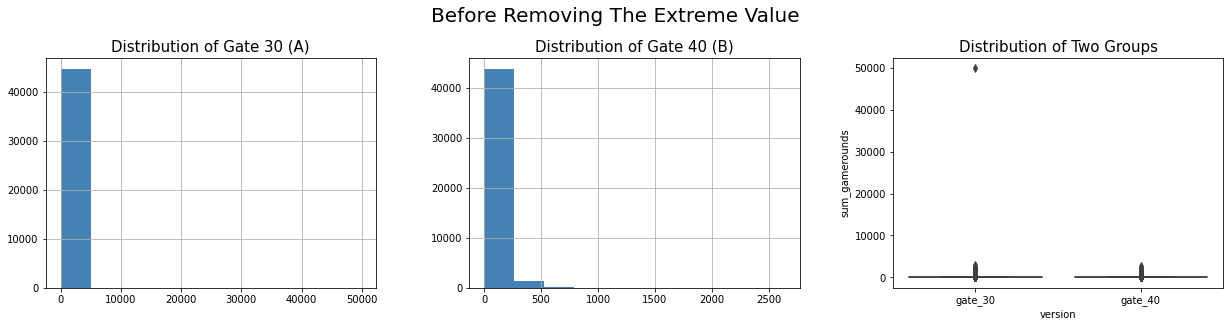

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
data[(data.version == "gate_30")].hist("sum_gamerounds", ax=axes[0], color="steelblue")
data[(data.version == "gate_40")].hist("sum_gamerounds", ax=axes[1], color="steelblue")
sns.boxplot(x=data.version, y=data.sum_gamerounds, ax=axes[2])

plt.suptitle("Before Removing The Extreme Value", fontsize=20)
axes[0].set_title("Distribution of Gate 30 (A)", fontsize=15)
axes[1].set_title("Distribution of Gate 40 (B)", fontsize=15)
axes[2].set_title("Distribution of Two Groups", fontsize=15)

plt.tight_layout(pad=4);

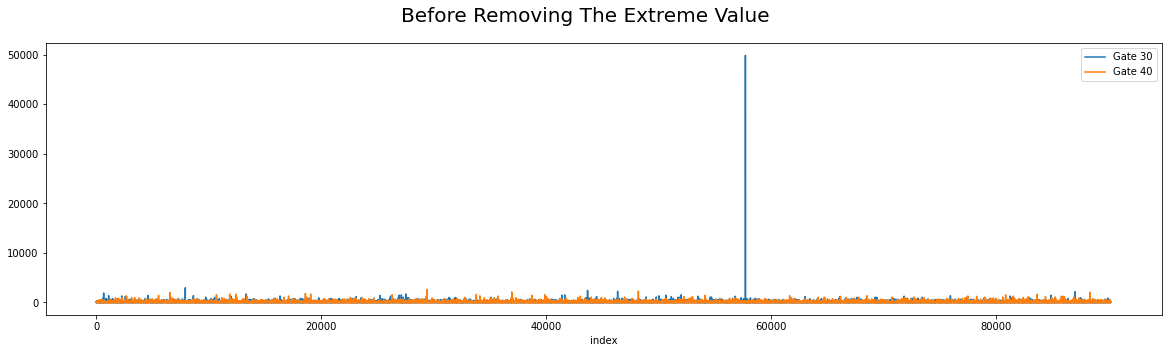

In [ ]:
data[data.version == "gate_30"].reset_index().set_index("index").sum_gamerounds.plot(
    legend=True, label="Gate 30", figsize=(20, 5)
)
data[data.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(
    legend=True, label="Gate 40"
)
plt.suptitle("Before Removing The Extreme Value", fontsize=20);

# **Outliers**

In [ ]:
data = data[data.sum_gamerounds < data.sum_gamerounds.max()]

# Summary Stats: sum_gamerounds.
data.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90188.0000,51.3203,102.6827,0.0000,0.0000,1.0000,1.0000,3.0000,16.0000,67.0000,134.0000,221.0000,493.0000,2961.0000


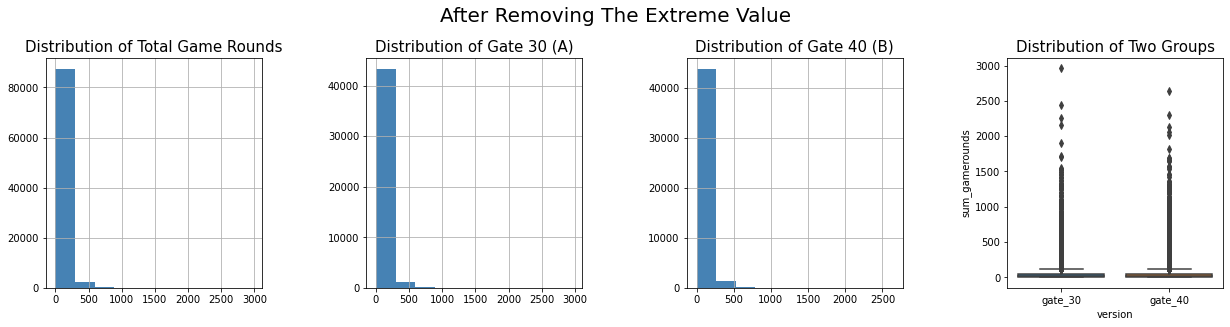

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
data.sum_gamerounds.hist(ax=axes[0], color="steelblue")
data[(data.version == "gate_30")].hist("sum_gamerounds", ax=axes[1], color="steelblue")
data[(data.version == "gate_40")].hist("sum_gamerounds", ax=axes[2], color="steelblue")
sns.boxplot(x=data.version, y=data.sum_gamerounds, ax=axes[3])

plt.suptitle("After Removing The Extreme Value", fontsize=20)
axes[0].set_title("Distribution of Total Game Rounds", fontsize=15)
axes[1].set_title("Distribution of Gate 30 (A)", fontsize=15)
axes[2].set_title("Distribution of Gate 40 (B)", fontsize=15)
axes[3].set_title("Distribution of Two Groups", fontsize=15)

plt.tight_layout(pad=4);

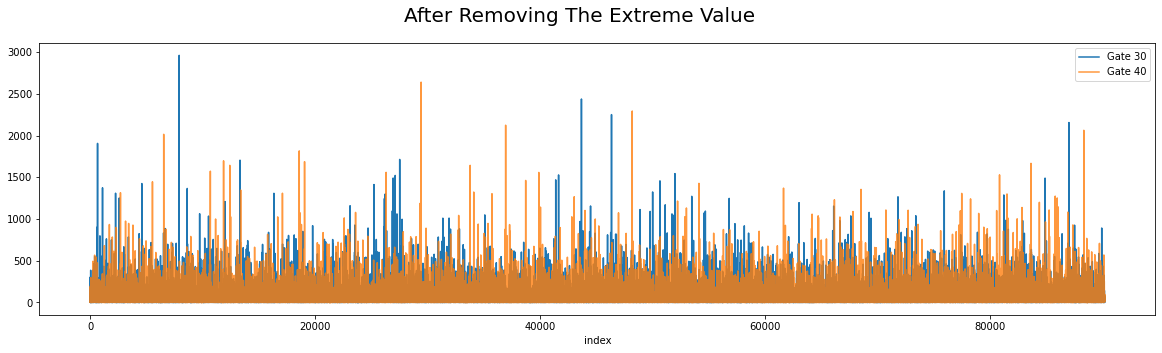

In [ ]:
data[(data.version == "gate_30")].reset_index().set_index("index").sum_gamerounds.plot(
    legend=True, label="Gate 30", figsize=(20, 5)
)
data[data.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(
    legend=True, label="Gate 40", alpha=0.8
)
plt.suptitle("After Removing The Extreme Value", fontsize=20);

# **Other Details**

> ***The users installed the game, but 3994 users never played the game!*** Some reasons might explain this situation.

- They have no free time to play the game.
- Users might prefer to play other games, or they play other games already.
- Some users don't like the app etc.
- You can comment below for these users also.

> ***The number of users decreases as the levels progress.***

- Most of the users played the game at an early stage, and they didn't progress.
- Tactile Entertainment should learn why users churn playing the game.
- Doing research and collecting data about the game and users would help to understand user churn.
- The difficulty of the game can be measured.
- Gifts might help player retention.

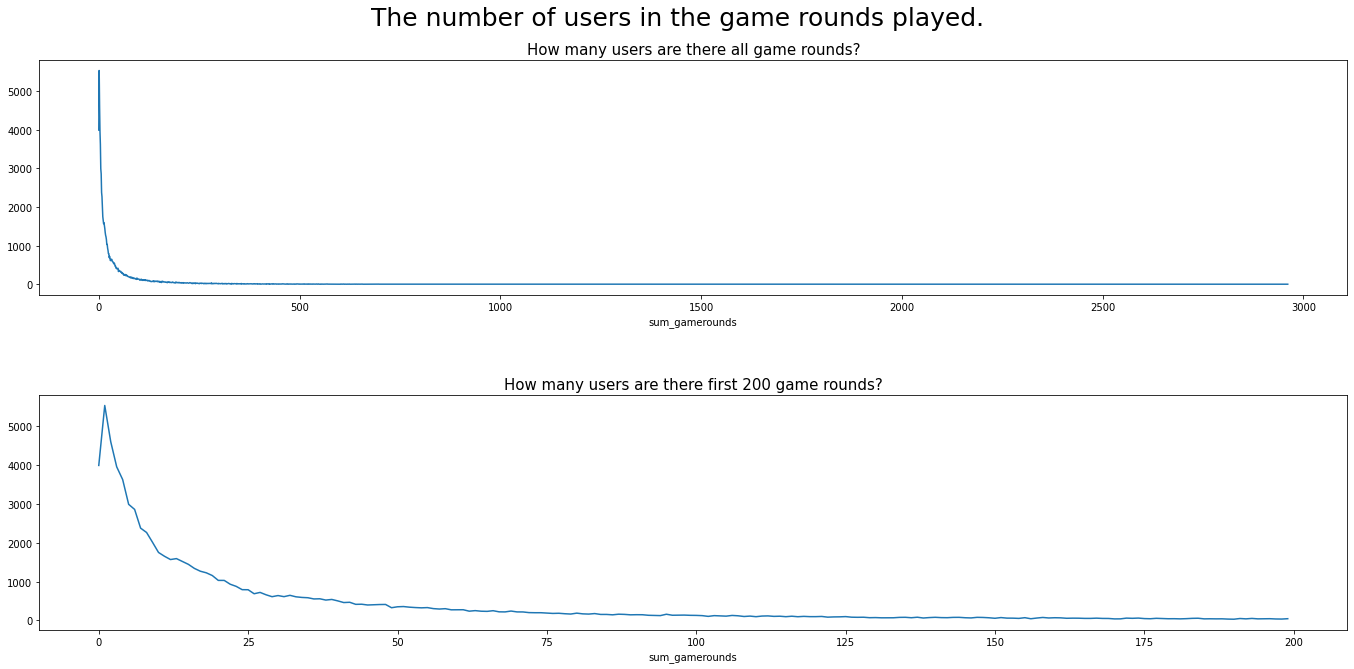

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
data.groupby("sum_gamerounds").userid.count().plot(ax=axes[0])
data.groupby("sum_gamerounds").userid.count()[:200].plot(ax=axes[1])
plt.suptitle("The number of users in the game rounds played.", fontsize=25)
axes[0].set_title("How many users are there all game rounds?", fontsize=15)
axes[1].set_title("How many users are there first 200 game rounds?", fontsize=15)

plt.tight_layout(pad=5);

In [ ]:
data.groupby("sum_gamerounds").userid.count().reset_index().head()

,sum_gamerounds,userid
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629


In [ ]:
# How many users reached 'Gate 30' and 'Gate 40' levels?
data.groupby("sum_gamerounds").userid.count().loc[[30, 40]]

sum_gamerounds
30    642
40    505
Name: userid, dtype: int64

***Looking at the summary statistics, the Control and Test groups seem similar, but are the two groups statistically significant?***

We will investigate this statistically.

In [ ]:
# A/B Groups & Target Summary Stats.
data.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44699,17.0000,51.3421,102.0576,2961
gate_40,45489,16.0000,51.2988,103.2944,2640


***Retention variables give player retention details.***

<li><code>retention_1</code> - did the player come back and play 1-day after installing?</li>
<li><code>retention_7</code> - did the player come back and play 7-day after installing?</li>

Also, players tend not to play the game! Many players also quit the game.

- $55\%$ of the players didn't play the game 1-day after installing.
- $81\%$ of the players didn't play the game 7-day after installing.

In [ ]:
# Retention Problem.
pd.DataFrame(
    {
        "RET1_COUNT": data["retention_1"].value_counts(),
        "RET7_COUNT": data["retention_7"].value_counts(),
        "RET1_RATIO": data["retention_1"].value_counts() / len(data),
        "RET7_RATIO": data["retention_7"].value_counts() / len(data),
    }
)

,RET1_COUNT,RET7_COUNT,RET1_RATIO,RET7_RATIO
False,50035,73408,0.5548,0.8139
True,40153,16780,0.4452,0.1861


***Looking at the summary statistics of retention variables by version and comparing with `sum_gamerounds`, there are similarities between groups. However, it will be more helpful to see if there is a statistically significant difference.***

In [ ]:
data.groupby(["version", "retention_1"]).sum_gamerounds.agg(
    ["count", "median", "mean", "std", "max"]
)

count  median    mean      std   max
version retention_1                                      
gate_30 False        24665  6.0000 16.3591  36.5284  1072
        True         20034 48.0000 94.4117 135.0377  2961
gate_40 False        25370  6.0000 16.3404  35.9258  1241
        True         20119 49.0000 95.3812 137.8873  2640

In [ ]:
data.groupby(["version", "retention_7"]).sum_gamerounds.agg(
    ["count", "median", "mean", "std", "max"]
)

count   median     mean      std   max
version retention_7                                        
gate_30 False        36198  11.0000  25.7965  43.3162   981
        True          8501 105.0000 160.1175 179.3586  2961
gate_40 False        37210  11.0000  25.8564  44.4061  2640
        True          8279 111.0000 165.6498 183.7925  2294

***Similar results occurred when the number of users who came and did not come 1 day and 7 days after the game was installed. Approximately 12.000 users among the total users played the game both 1 day and 7 days after installing the game. 14% of the total users include people who will continue the game in the future.***

In [ ]:
data["Retention"] = np.where(
    (data.retention_1 == True) & (data.retention_7 == True), 1, 0
)
data.groupby(["version", "Retention"])["sum_gamerounds"].agg(
    ["count", "median", "mean", "std", "max"]
)

count   median     mean      std   max
version Retention                                        
gate_30 0          38023  12.0000  28.0703  48.0175  1072
        1           6676 127.0000 183.8863 189.6264  2961
gate_40 0          38983  12.0000  28.1034  48.9278  2640
        1           6506 133.0000 190.2824 194.2201  2294

***When the retention variables are combined and the two groups are compared, the summary statistics are similar here as well.***

In [ ]:
data["NewRetention"] = list(
    map(lambda x, y: str(x) + "-" + str(y), data.retention_1, data.retention_7)
)

data.groupby(["version", "NewRetention"]).sum_gamerounds.agg(
    ["count", "median", "mean", "std", "max"]
).reset_index()

,version,NewRetention,count,median,mean,std,max
0,gate_30,False-False,22840,6.0000,11.8197,21.6426,981
1,gate_30,False-True,1825,43.0000,73.1693,93.2223,1072
2,gate_30,True-False,13358,33.0000,49.6945,58.1254,918
3,gate_30,True-True,6676,127.0000,183.8863,189.6264,2961
4,gate_40,False-False,23597,6.0000,11.9133,20.9010,547
5,gate_40,False-True,1773,47.0000,75.2611,94.4780,1241
6,gate_40,True-False,13613,32.0000,50.0255,60.9246,2640
7,gate_40,True-True,6506,133.0000,190.2824,194.2201,2294


# **A/B Testing**

#### **Assumptions:**
- Check Normality.
- If Normal Distribution, check Homogeneity.

#### **Steps:**
- Split and Define **Control Group** & **Test Group**.
- Apply **Shapiro Test** for Normality.
- If parametric, apply **Levene Test for homogeneity of variances**.
- If Parametric $+$ homogeneity of variances, apply **T-test**.
- If Parametric $-$ homogeneity of variances, apply **Welch Test**.
- If Non-parametric, apply **Mann Whitney U Test** directly.

In [ ]:
# Define A/B Groups.
data["version"] = np.where(data.version == "gate_30", "A", "B")
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7,Retention,NewRetention
0,116,A,3,False,False,0,False-False
1,337,A,38,True,False,0,True-False
2,377,B,165,True,False,0,True-False
3,483,B,1,False,False,0,False-False
4,488,B,179,True,True,1,True-True


In [ ]:
# A/B Testing Function - Quick Solution.
def AB_Test(dataframe, group, target):

    # Split A/B.
    groupA = dataframe[dataframe[group] == "A"][target]
    groupB = dataframe[dataframe[group] == "B"][target]

    # Assumption: Normality.
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05

    if (ntA == False) & (ntB == False):
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        if leveneTest == False:
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
        else:
            ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
    else:
        ttest = stats.mannwhitneyu(groupA, groupB)[1]

    # Result.
    temp = pd.DataFrame({"AB Hypothesis": [ttest < 0.05], "p-value": [ttest]})
    temp["Test Type"] = np.where(
        (ntA == False) & (ntB == False), "Parametric", "Non-Parametric"
    )
    temp["AB Hypothesis"] = np.where(
        temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0"
    )
    temp["Comment"] = np.where(
        temp["AB Hypothesis"] == "Fail to Reject H0!",
        "A/B groups are similar!",
        "A/B groups are not similar!",
    )

    # Columns.
    if (ntA == False) & (ntB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Test Type", "Homogeneity", "AB Hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type", "AB Hypothesis", "p-value", "Comment"]]

    # Print Hypothesis.
    print("### A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")
    return temp


# Apply A/B Testing.
AB_Test(dataframe=data, group="version", target="sum_gamerounds")

### A/B Testing Hypothesis
H0: A == B
H1: A != B 



,Test Type,AB Hypothesis,p-value,Comment
0,Non-Parametric,Reject H0,0.0254,A/B groups are not similar!


# **Conclusion**

### Remember business problem!

**As players progress through the game, they will encounter gates that force them to wait sometime before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention and game rounds.**

Firstly, we investigated relationships and structures in the data. There was no missing value problem but was one outlier problem in the data. Summary stats and plots help us to understand the data and problem.

After applying A/B Testing, the analysis result gives us some important information. Shapiro Testing rejected $H_{0}$ for the Normality assumption. Therefore we needed to apply a Non-parametric test called **Mann Whitney U** to compare two groups. As a result, Mann Whitney U Testing rejected the $H_{0}$ hypothesis, and we learned A/B groups are not similar! Briefly, there is a statistically significant difference between the two groups about moving the first gate from level 30 to level 40 for game rounds.

### Which level has more advantages in terms of player retention?

1-day and 7-day average retention are higher when the gate is at level 30 than when it is at level 40.

In [ ]:
data.groupby("version").retention_1.mean(), data.groupby("version").retention_7.mean()

(version
 A   0.4482
 B   0.4423
 Name: retention_1, dtype: float64, version
 A   0.1902
 B   0.1820
 Name: retention_7, dtype: float64)

The gate should be at level 30, but average retentions look similar. We need more data for similarity.